# Exploring The Samples

Basic look at the complete list of samples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from adl_func_client.event_dataset import EventDataset
from adl_func_client.use_exe_func_adl_server import use_exe_func_adl_server
import asyncio
import math
from collections import namedtuple

df_loc = "../data/datasets.csv"

Get a table of everything avalible.

In [2]:
datasets = pd.read_csv(df_loc)

In [3]:
datasets

,mH,mS,Lifetime,MCCampaign,RucioDSName
0,60,5,5,mc16a,mc16_13TeV.311417.MGPy8EG_A14NNPDF23_NNPDF31ME...
1,60,5,5,mc16d,mc16_13TeV.311417.MGPy8EG_A14NNPDF23_NNPDF31ME...
2,60,5,5,mc16e,mc16_13TeV.311417.MGPy8EG_A14NNPDF23_NNPDF31ME...
3,60,15,5,mc16a,mc16_13TeV.311418.MGPy8EG_A14NNPDF23_NNPDF31ME...
4,60,15,5,mc16d,mc16_13TeV.311418.MGPy8EG_A14NNPDF23_NNPDF31ME...
5,60,15,5,mc16e,mc16_13TeV.311418.MGPy8EG_A14NNPDF23_NNPDF31ME...
6,125,5,5,mc16a,mc16_13TeV.311309.MadGraphPythia8EvtGen_A14NNP...
7,125,5,5,mc16d,mc16_13TeV.311309.MadGraphPythia8EvtGen_A14NNP...
8,125,5,5,mc16e,mc16_13TeV.311309.MadGraphPythia8EvtGen_A14NNP...
9,125,5,9,mc16a,mc16_13TeV.311310.MadGraphPythia8EvtGen_A14NNP...


## Count Numbers of Events

Look at each dataset in turn, and get the total number of jets

In [4]:
async def get_jet_pt_distro(df_name:str):
    'Return a future that will be a pandas array of the number of jets'
    return await EventDataset(f'localds://{df_name}') \
        .SelectMany('lambda e: e.Jets("AntiKt4EMTopoJets")') \
        .Where('lambda j: j.pt()/1000.0 > 40.0') \
        .Select('lambda j: j.pt()/1000.0') \
        .AsPandasDF(['JetPt']) \
        .future_value(use_exe_func_adl_server)

In [7]:
DSInfo = namedtuple('DSInfo', 'mH mS lt cp data')
async def info_tuple (mH, mS, lt, cp, ds):
    return DSInfo(mH, mS, lt, cp, await get_jet_pt_distro(ds))
pd_arrays = [info_tuple(mH, mS, lt, cp, ds) for index, (mH, mS, lt, cp, ds) in datasets.iterrows()]

In [8]:
%time
results = await asyncio.gather(*pd_arrays)

Wall time: 1 ms


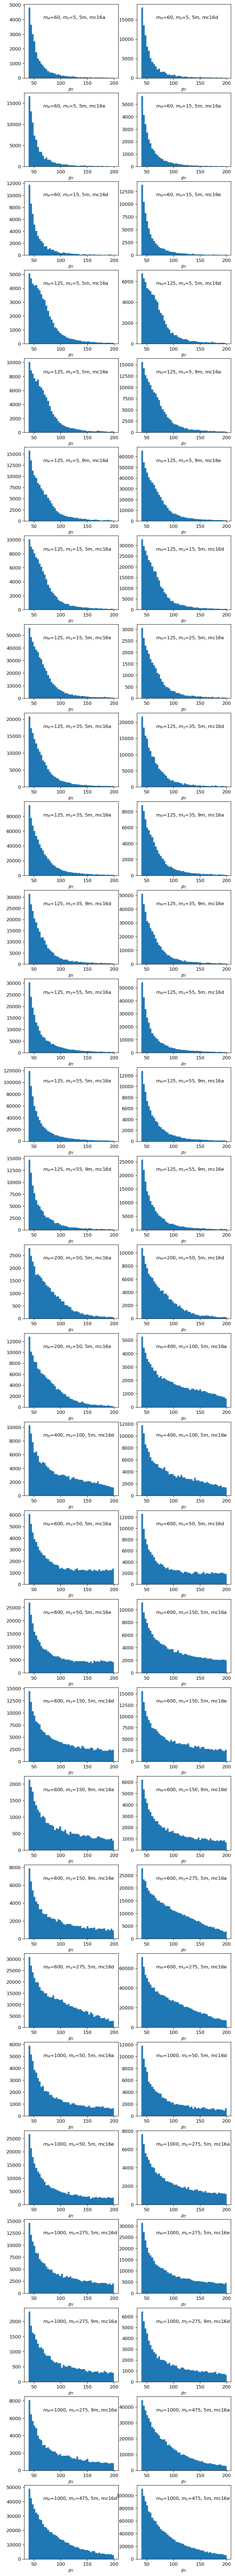

In [13]:
x_pannel=2
y_pannel=math.ceil(len(results)/x_pannel)
fig = plt.figure(figsize=(8,3.5*y_pannel), dpi=120)
for idx, pinfo in enumerate(results):
    fig.add_subplot(y_pannel, x_pannel, idx+1)
    plt.hist(pinfo.data.JetPt, bins=50, range=[40, 200])
    plt.xlabel('$p_T$')
    plt.annotate(f'$m_H$={pinfo.mH}, $m_s$={pinfo.mS}, {pinfo.lt}m, {pinfo.cp}', xy=(.2,.8), xycoords="axes fraction") 